Processing f1.jpg...
Number of pixels: 54105.00
Area: 831918480.00 square meters
Lantanas (kg): 332767392.00 kg
Lantanas (metric tons): 332767.39 metric tons



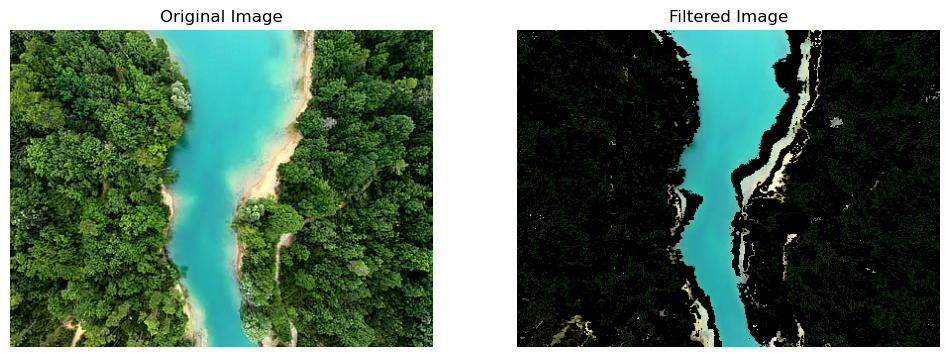

Processing f2.jpg...
Number of pixels: 111008.00
Area: 1706859008.00 square meters
Lantanas (kg): 682743603.20 kg
Lantanas (metric tons): 682743.60 metric tons



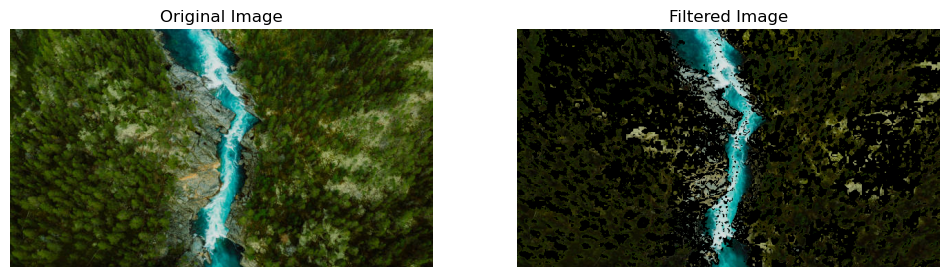

Processing f3.jpg...
Number of pixels: 320007.00
Area: 4920427632.00 square meters
Lantanas (kg): 1968171052.80 kg
Lantanas (metric tons): 1968171.05 metric tons



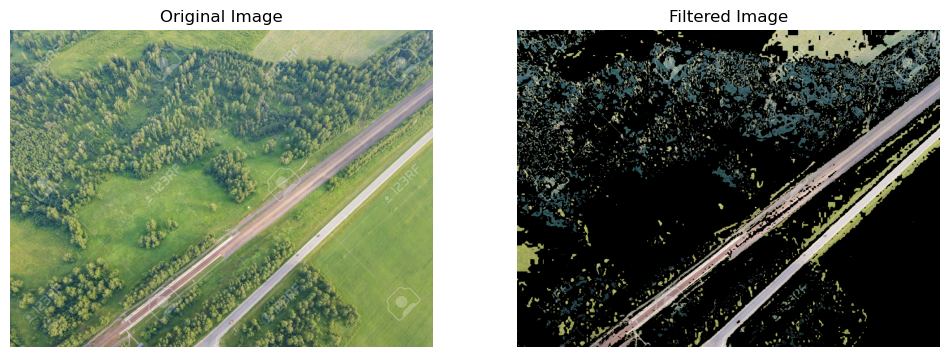

Processing f4.jpg...
Number of pixels: 61613.00
Area: 947361488.00 square meters
Lantanas (kg): 378944595.20 kg
Lantanas (metric tons): 378944.60 metric tons



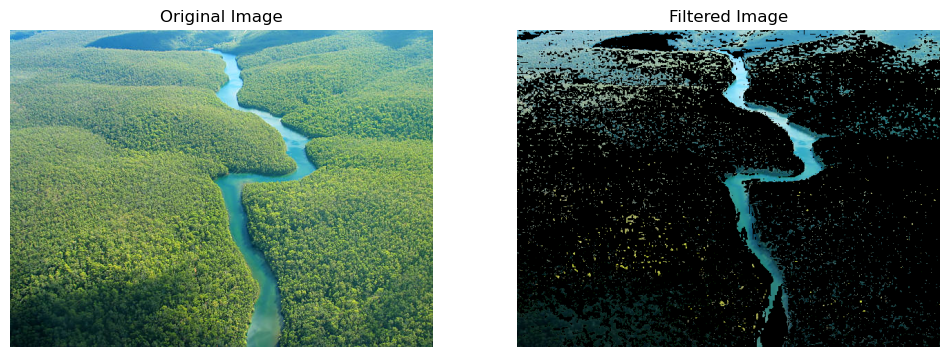

Processing f5_NGO.jpg...
Number of pixels: 890049.00
Area: 13685393424.00 square meters
Lantanas (kg): 5474157369.60 kg
Lantanas (metric tons): 5474157.37 metric tons



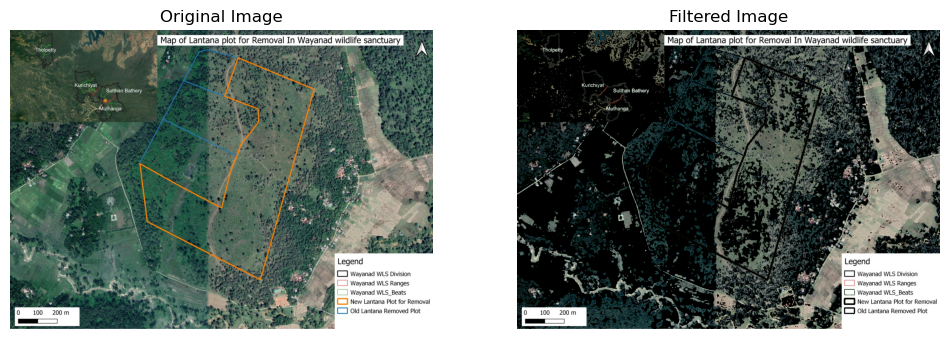

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def remove_colors(image_path, color_ranges):
    img = cv2.imread(image_path)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    mask = np.zeros(img_hsv.shape[:2], dtype=np.uint8)

    for (lower_bound, upper_bound) in color_ranges:
        lower_bound = np.array(lower_bound, dtype=np.uint8)
        upper_bound = np.array(upper_bound, dtype=np.uint8)
        color_mask = cv2.inRange(img_hsv, lower_bound, upper_bound)
        mask = cv2.bitwise_or(mask, color_mask)

    result = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask))
    return img, result

def get_number_of_pixels(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    number_of_pixels = np.sum(img_gray > 0)
    return float(number_of_pixels)

def calculate_area(number_of_pixels, pixel_size_meters):
    return number_of_pixels * (float(pixel_size_meters) ** 2)

def calculate_biomass(area_meters, yield_per_m2):
    return area_meters * float(yield_per_m2)

def convert_kg_to_metric_tons(biomass_kg):
    return biomass_kg / 1000.0

def main(image_paths, pixel_size_meters, color_ranges, yield_per_m2):
    for image_path in image_paths:
        original_img, filtered_img = remove_colors(image_path, color_ranges)

        number_of_pixels = get_number_of_pixels(filtered_img)
        area_meters = calculate_area(number_of_pixels, pixel_size_meters)
        biomass_kg = calculate_biomass(area_meters, yield_per_m2)
        biomass_metric_tons = convert_kg_to_metric_tons(biomass_kg)
        
        print(f"Processing {image_path}...")
        print(f"Number of pixels: {number_of_pixels:.2f}")
        print(f"Area: {area_meters:.2f} square meters")
        print(f"Lantanas (kg): {biomass_kg:.2f} kg")
        print(f"Lantanas (metric tons): {biomass_metric_tons:.2f} metric tons\n")

        # Show the original and filtered images side by side
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
        filtered_img = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.title('Original Image')
        plt.imshow(original_img)
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title('Filtered Image')
        plt.imshow(filtered_img)
        plt.axis('off')

        plt.show()

if __name__ == "__main__":
    image_paths = ["f1.jpg", "f2.jpg", "f3.jpg", "f4.jpg", "f5_NGO.jpg"]
    pixel_size_meters = 124.0
    yield_per_m2 = 0.4

    color_ranges = [
        ([100, 50, 50], [140, 255, 255]),  # Blue color range (for lakes)
        ([10, 50, 50], [25, 255, 255]),    # Brown color range (for land)
        ([35, 50, 50], [85, 255, 255]),    # Green color range
        ([60, 40, 60], [80, 60, 90])       # Another color range
    ]

    main(image_paths, pixel_size_meters, color_ranges, yield_per_m2)
